# Digit Recogonizer using GDBT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
import xgboost as xgb
from sklearn.datasets import load_digits

### Read data

(1437, 64) (360, 64) (1437,) (360,)
[ 0.  0.  0.  9. 15.  2.  0.  0.  0.  0.  5. 16. 11.  1.  0.  0.  0.  0.
 13. 15.  1.  0.  0.  0.  0.  2. 16. 11.  0.  0.  0.  0.  0.  2. 16. 11.
  4.  4.  0.  0.  0.  2. 15. 16. 16. 14. 10.  1.  0.  0.  9. 16.  7.  3.
 15.  6.  0.  0.  0.  7. 15. 16. 16.  6.]


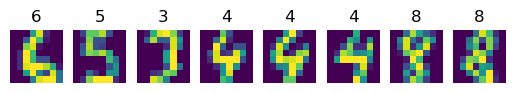

In [2]:
data_dir = './data/knn'
sample_rows = 5000

# def load_data(data_dir):
#     data = pd.read_csv(f'{data_dir}/train.csv/train.csv', nrows=sample_rows)
#     training_data = data.values[:,1:]    
#     training_label_data = data.values[:, 0]
#     test_data = pd.read_csv(f'{data_dir}/test.csv/test.csv').values
#     return training_data, training_label_data, test_data

digits = load_digits()

train_x, test_x, train_y, test_y = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)
print(train_x[0])
for i in range(8):    
    plt.subplot(1, 8, i + 1)
    plt.title(train_y[i])
    plt.axis('off')
    plt.imshow(train_x[i].reshape(8,8))

### Analyze data

### Train model

In [3]:
d_train = xgb.DMatrix(train_x, label=train_y)
param = {'max_depth': 10, 'eta': 0.1, 'objective':'multi:softmax', 'num_class': 10}

num_round = 10
model = xgb.train(param, d_train, num_round)
predict_y = model.predict(xgb.DMatrix(test_x, label=None))
print('accuracy_score: ' , accuracy_score(test_y, predict_y))    
print('classification_report: ' , classification_report(test_y, predict_y))    

accuracy_score:  0.9388888888888889
classification_report:                precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.82      0.91      0.86        35
           2       0.92      0.94      0.93        36
           3       0.91      1.00      0.95        29
           4       1.00      0.97      0.98        30
           5       0.95      0.95      0.95        40
           6       1.00      0.93      0.96        44
           7       0.95      0.97      0.96        39
           8       0.97      0.90      0.93        39
           9       0.97      0.88      0.92        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



### Evaluate model

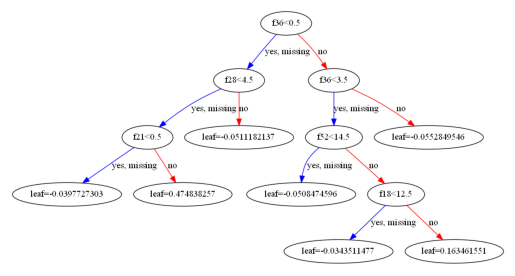

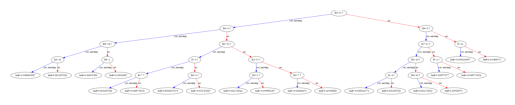

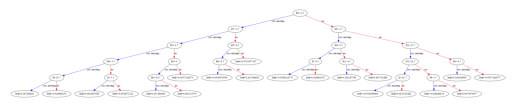

In [4]:
features = sorted(model.get_score(importance_type='weight').items(), key=lambda x: x[1], reverse=True)

for i in range(3):
    xgb.plot_tree(model, num_trees=i)

### Predit on test dataset


### Output

In [5]:

# df = pd.DataFrame()
# df.to_csv('submission.csv',index = False, header=True)